# Script for behavioral data analysis across subjects -- EEG


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb
import scipy as sp
import statsmodels.api as sm

homeDir = '/Users/yvonnefonken/Documents/Oxford/Research Projects/EEG/Catch4Critters_2019/EEGdata/'
CSVDir  = homeDir 
resultsDir = homeDir + '/AcrossSubsResults'

In [ ]:
sb.factorplot?

In [5]:
# load data 

os.chdir(CSVDir)

#s01 = pd.read_csv('01.csv')
s1 = pd.read_csv('1_eegO.csv')
s2 = pd.read_csv('2_eegO.csv')
s3 = pd.read_csv('3_eegO.csv')
s4 = pd.read_csv('4_eegO.csv')
s5 = pd.read_csv('5_eegO.csv')
s6 = pd.read_csv('6_eegO.csv')
s7 = pd.read_csv('7_eegO.csv')
s8 = pd.read_csv('8_eegO.csv')
s9 = pd.read_csv('9_eegO.csv')
s10 = pd.read_csv('10_eegO.csv')
s11 = pd.read_csv('11_eegO.csv')
s12 = pd.read_csv('12_eegO.csv')
s13 = pd.read_csv('13_eegO.csv')
s14 = pd.read_csv('14_eegO.csv')
s15 = pd.read_csv('15_eegO.csv')
s16 = pd.read_csv('16_eegO.csv')
s17 = pd.read_csv('17_eegO.csv')
s18 = pd.read_csv('18_eegO.csv')
s19 = pd.read_csv('19_eegO.csv')
s20 = pd.read_csv('20_eegO.csv')
s21 = pd.read_csv('21_eegO.csv')
s22 = pd.read_csv('22_eegO.csv')
s23 = pd.read_csv('23_eegO.csv')
s24 = pd.read_csv('24_eegO.csv')
s25 = pd.read_csv('25_eegO.csv')
s26 = pd.read_csv('26_eegO.csv')
s27 = pd.read_csv('27_eegO.csv')
s28 = pd.read_csv('28_eegO.csv')
s29 = pd.read_csv('29_eegO.csv')
s30 = pd.read_csv('30_eegO.csv')



# Learning block:
#L01 = pd.read_csv('1_L.csv')
#L02 = pd.read_csv('2_L.csv')
#L03 = pd.read_csv('3_L.csv')
#L04 = pd.read_csv('4_L.csv')
#L05 = pd.read_csv('5_L.csv')
#L06 = pd.read_csv('6_L.csv')
#L07 = pd.read_csv('7_L.csv')
#L08 = pd.read_csv('8_L.csv')
#L10 = pd.read_csv('10_L.csv')
#L11 = pd.read_csv('11_L.csv')
#L12 = pd.read_csv('12_L.csv')

L18 = pd.read_csv('18_eegL.csv')
L19 = pd.read_csv('19_eegL.csv')
L20 = pd.read_csv('20_eegL.csv')
L21 = pd.read_csv('21_eegL.csv')
L22 = pd.read_csv('22_eegL.csv')
L23 = pd.read_csv('23_eegL.csv')
L24 = pd.read_csv('24_eegL.csv')
L25 = pd.read_csv('25_eegL.csv')
L26 = pd.read_csv('26_eegL.csv')
L27 = pd.read_csv('27_eegL.csv')
L28 = pd.read_csv('28_eegL.csv')
L29 = pd.read_csv('29_eegL.csv')
L30 = pd.read_csv('30_eegL.csv')





In [6]:
# combine into one dataframe
frames = [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12, s13, s14, s15, s16, s17,s18, s19, s20, s21, s22, s23, s24, s25, s26, s27, s28, s29, s30]#[s1, s2, s3, s4, s5, s6, s7, s8, s9, s10]
framesL = [L18, L19, L20, L21, L22, L23, L24, L25, L26, L27, L28, L29, L30]#[L01, L02, L03, L04, L05, L06, L07, L08, L10, L11, L12]

#frames = [s14]
data = pd.concat(frames)#, ignore_index = True)
dataL = pd.concat(framesL)

#df = data['subCode', 'DelaySecs', 'Marker', 'TargetIdentity', 'validity', 'answer', 'correctAnswer']
df = data#[['DelaySecs', 'Keys', 'Marker', 'TargetIdentity', 'TargetStim', 'answer', 'correctAnswer', 'recRT', 'subCode', 'validity', 'vidName', 'kind', 'nRep', 'nRepValidity']]
dfL = dataL


In [7]:
df

,Unnamed: 0,trlNum,Delay,ActualDelay,Critter,Condition,Answer,RT,trialStamp,TargetStamp,jitterDur,correct,Scene,TargetCorrectButton,TargetX,TargetY,Delay2,subCode,blockType,delayRep
0,0,1,2000.0,710,Frog,random,4.0,940.6,5339.1,7338.9,300.0,1,34,1,9999.0,9999.0,1999.8,1,Orienting,1
1,1,2,3200.0,1910,Parrot,predicted,5.0,705.2,11918.5,15118.1,260.0,1,29,2,-335.0,197.0,3199.6,1,Orienting,1
2,2,3,2000.0,710,Cricket,random,7.0,743.7,18087.9,20087.7,160.0,1,24,4,9999.0,9999.0,1999.8,1,Orienting,1
3,3,4,3200.0,1910,Cricket,predicted,7.0,728.5,24247.2,27446.9,150.0,1,25,4,202.0,-206.0,3199.7,1,Orienting,1
4,4,5,2000.0,710,Cricket,predicted,7.0,641.0,30366.6,32366.4,110.0,1,2,4,-114.0,157.0,1999.8,1,Orienting,1
5,5,6,3200.0,1910,Cricket,random,7.0,525.5,36546.0,39745.7,170.0,1,5,4,9999.0,9999.0,3199.7,1,Orienting,1
6,6,7,3200.0,1910,Bee,predicted,6.0,696.2,42695.4,45895.1,140.0,1,7,3,257.0,188.0,3199.7,1,Orienting,1
7,7,8,3200.0,1910,Parrot,predicted,5.0,556.7,48874.8,52074.5,170.0,1,4,2,-109.0,-170.0,3199.7,1,Orienting,1
8,8,9,2000.0,710,Frog,random,4.0,667.2,55164.2,57164.0,280.0,1,6,1,9999.0,9999.0,1999.8,1,Orienting,1
9,9,10,3200.0,1910,Cricket,predicted,7.0,577.9,61453.6,64653.3,280.0,1,42,4,-191.0,-215.0,3199.7,1,Orienting,1


In [5]:
df['subCode'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [ ]:
df

/Users/yvonnefonken/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


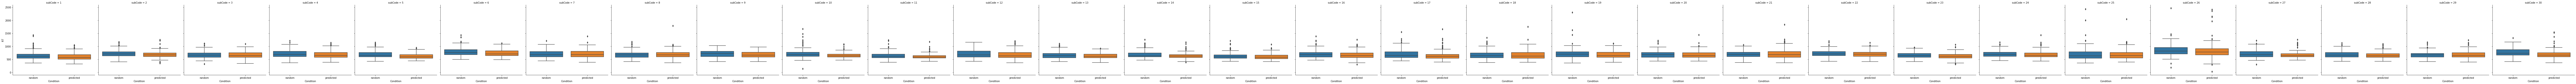

In [9]:
# single subject RT distribution
#grouped = df.groupby(['DelaySecs', 'subCode'])
#grouped
sb.factorplot(data = df, x = 'Condition', y = 'RT', col = 'subCode', kind = 'box')

In [ ]:
# Remove third block from timing testing
#df.set_index(['Marker'])
df = df[df['nRep'] < 7]
df['nRep']

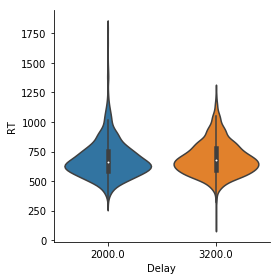

In [8]:
#Scatterplots
#plt.scatter(df['DelaySecs'].astype(str), df['recRT'])
sb.factorplot(data = df, x = 'Delay', y = 'RT', kind = 'violin')

## Look at response distributions for different conditions

                      mean
Answer subCode            
4.0    18       550.784906
       19       745.600000
       20       638.980000
       21       620.221569
       22       708.509091
       23       650.860606
       24       731.383607
       25       682.883333
       26       754.675000
       27       661.989552
       28       636.848387
       29       677.533333
       30       767.278723
5.0    18       735.350000
       19       664.584000
       20       645.939286
       21       707.723913
       22       706.071429
       23       635.575000
       24       654.171154
       25       670.193220
       26       908.808889
       27       702.400000
       28       675.284615
       29       717.984314
       30       740.921311
6.0    18       687.382759
       19       646.478947
       20       742.706250
       21       696.860714
       22       653.466667
       23       592.602941
       24       628.692500
       25       733.112000
       26       784.246875
 

/Users/yvonnefonken/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


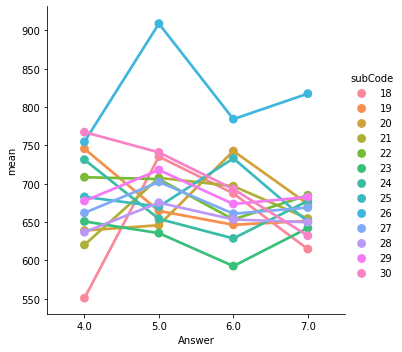

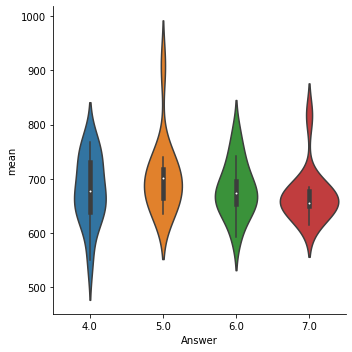

In [6]:
# Check if target identity makes a difference
groupID = df[df['correct'] == 1.0].groupby(['Answer', 'subCode'])
identityGr = groupID['RT']
identityGrAgg = identityGr.agg(['mean'])
print (identityGrAgg)
#T1 = identityGrAgg.loc[(['frog'], 'mean')]

#T2 = identityGrAgg.loc[(['parrot'], 'mean')]
identityGrAgg = identityGrAgg.reset_index()
#ttestResults = sp.stats.ttest_rel(T1, T2)
#print(ttestResults)


sb.factorplot(x = 'Answer', y = 'mean', data =identityGrAgg, hue = 'subCode')

sb.factorplot(x = 'Answer', y = 'mean', data = identityGrAgg, kind = 'violin')




In [7]:
# Check if color/which buttonpress makes a difference
groupID = df[df['correct'] == 1.0].groupby(['Answer', 'subCode'])
identityGr = groupID['RT']
identityGrAgg = identityGr.agg(['mean'])
T1 = identityGrAgg.loc[(["3.0"], 'mean')]

T2 = identityGrAgg.loc[(["4.0"], 'mean')]
identityGrAgg = identityGrAgg.reset_index()
ttestResults = sp.stats.ttest_rel(T1, T2)
print(ttestResults)

sb.factorplot(x= 'Answer', y = 'mean', data =identityGrAgg, hue = 'subCode')

sb.factorplot(x = 'Answer', y = 'mean', data = identityGrAgg, kind = 'violin')

KeyError: "['3.0'] not in index"

In [ ]:
# Check if DelaySecs  makes a difference
groupID = df[df['correct'] == 1.0].groupby(['Delay', 'subCode'])
identityGr = groupID['RT']
identityGrAgg = identityGr.agg(['mean'])

#T1 = identityGrAgg.loc[([0.75], 'mean')]

#T2 = identityGrAgg.loc[([1.75], 'mean')]
identityGrAgg = identityGrAgg.reset_index()
#ttestResults = sp.stats.ttest_rel(T1, T2)
#print(ttestResults)

sb.factorplot(x= 'Delay', y = 'mean', data =identityGrAgg, hue = 'subCode')

sb.factorplot(x = 'Delay', y = 'mean', data = identityGrAgg, kind = 'violin')

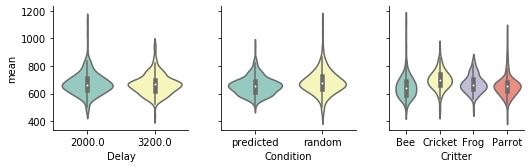

In [10]:
# Create pairgrid of all relevant 
#grouped = df[df['correctAnswer'] == 1.0].groupby(['DelaySecs', 'subCode', 'nRepValidity', 'kind'])
group1 = df[df['correct'] == 1.0].groupby(['Delay', 'Condition','Critter', 'subCode'])
group2 = group1['RT']
groupAggOverall = group2.agg(['mean']).reset_index()
g = sb.PairGrid(groupAggOverall, x_vars = ['Delay', 'Condition', 'Critter'], y_vars = ['mean'] )
g.map(sb.violinplot, palette = 'Set3')

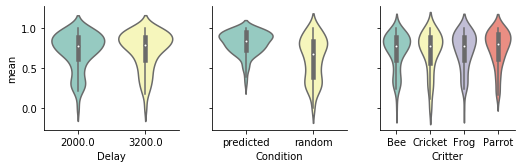

In [11]:
# Create pairgrid of all relevant 
#grouped = df[df['correctAnswer'] == 1.0].groupby(['DelaySecs', 'subCode', 'nRepValidity', 'kind'])
group1 = df.groupby(['Delay', 'Condition','Critter', 'subCode'])
group2 = group1['correct']
groupAggOverall = group2.agg(['mean']).reset_index()
g = sb.PairGrid(groupAggOverall, x_vars = ['Delay', 'Condition', 'Critter'], y_vars = ['mean'] )
g.map(sb.violinplot, palette = 'Set3')

In [13]:
indexCorrect = (df['correct'] == 1) & (df['RT']< 1200)

In [ ]:
%matplotlib inline 
#RT by validity
grouped = df[indexCorrect].groupby(['Delay', 'subCode', 'Condition'])
grouped_RT = grouped['RT']
aggRTdata = grouped_RT.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Delay' , y = 'mean', data = aggRTdata, hue = 'Condition', palette = 'Blues')

#Precision
groupedP = df[df['RT'] < 1200].groupby(['Delay', 'subCode', 'Condition'])
grouped_P = groupedP['correct']
aggPrecdata = grouped_P.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Delay' , y = 'mean', data = aggPrecdata, hue = 'Condition', palette = 'Reds')

/Users/yvonnefonken/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


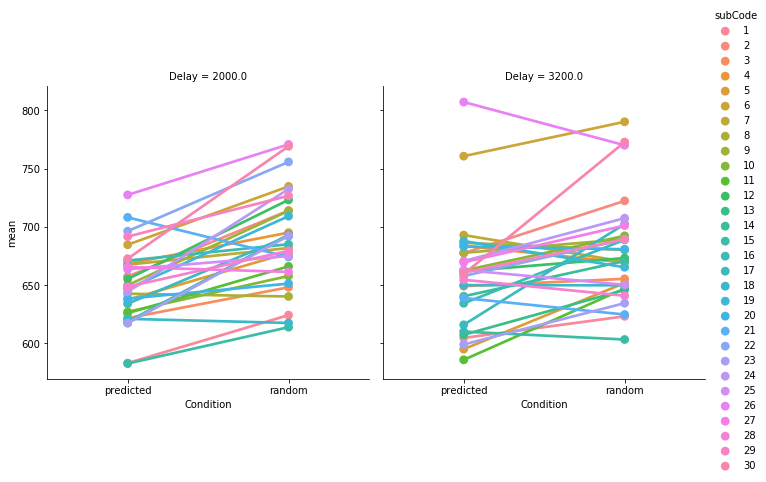

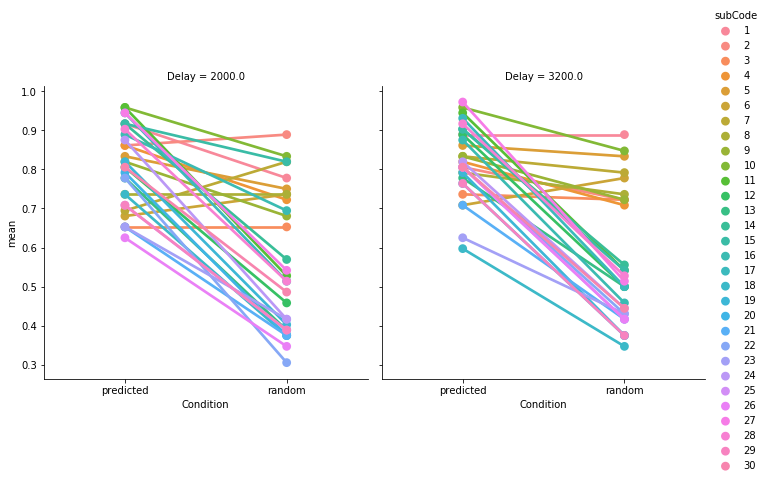

In [14]:
#By subject
%matplotlib inline
#RT by validity
grouped = df[indexCorrect].groupby(['Delay', 'subCode', 'Condition'])
grouped_RT = grouped['RT']
aggRTdata = grouped_RT.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Condition' , y = 'mean', data = aggRTdata, hue = 'subCode', col = 'Delay')

#Precision
groupedP = df.groupby(['Delay', 'subCode', 'Condition'])
grouped_P = groupedP['correct']
aggPrecdata = grouped_P.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Condition' , y = 'mean', data = aggPrecdata, hue = 'subCode', col = 'Delay')



In [22]:
aggRTdata = grouped_RT.agg(['mean', 'std', 'min', 'max'])
aggRTdata.reset_index()
#aggRTdata[aggRTdata['Condition'] == 'random']-aggRTdata[aggRTdata['Condition'] == 'predicted']

,subCode,Condition,mean,std,min,max
0,1,predicted,593.795385,117.797258,374.5,1015.5
1,1,random,623.787288,134.959708,360.5,1124.2
2,2,predicted,667.110924,100.307300,348.1,947.6
3,2,random,717.809483,126.085420,534.7,1165.7
4,3,predicted,636.289000,119.180325,338.9,946.6
5,3,random,652.057576,101.678123,453.7,912.5
6,4,predicted,675.990909,147.542637,384.2,1143.1
7,4,random,682.440777,137.009969,366.9,1071.5
8,5,predicted,615.972131,104.778024,445.9,950.2
9,5,random,664.140351,143.528444,420.9,1143.6


In [23]:
aggPrecdata

,Delay,subCode,Condition,mean,std,min,max
0,2000.0,1,predicted,0.916667,0.278325,0,1
1,2000.0,1,random,0.777778,0.418657,0,1
2,2000.0,2,predicted,0.861111,0.348257,0,1
3,2000.0,2,random,0.888889,0.316475,0,1
4,2000.0,3,predicted,0.652778,0.479428,0,1
5,2000.0,3,random,0.652778,0.479428,0,1
6,2000.0,4,predicted,0.861111,0.348257,0,1
7,2000.0,4,random,0.722222,0.451046,0,1
8,2000.0,5,predicted,0.833333,0.375293,0,1
9,2000.0,5,random,0.750000,0.436051,0,1


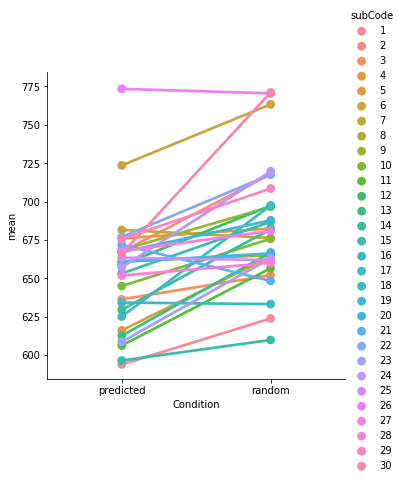

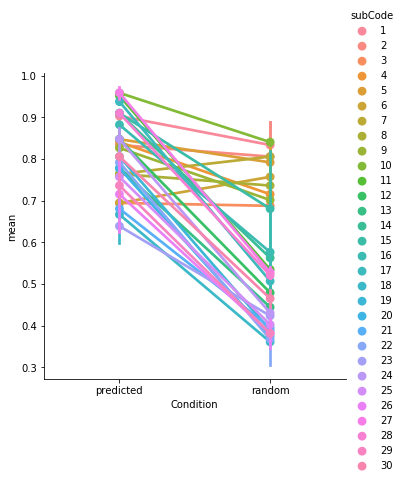

In [15]:
#By subject
%matplotlib inline
#RT by validity
grouped = df[indexCorrect].groupby([ 'subCode', 'Condition'])
grouped_RT = grouped['RT']
aggRTdata = grouped_RT.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Condition' , y = 'mean', data = aggRTdata, hue = 'subCode')

#Precision
groupedP = df.groupby(['Delay', 'subCode', 'Condition'])
grouped_P = groupedP['correct']
aggPrecdata = grouped_P.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Condition' , y = 'mean', data = aggPrecdata, hue = 'subCode')

In [ ]:
indexCorrectL = (dfL['correct'] == 1) & (dfL['RT1']< 1800)

%matplotlib inline 
#RT by validity
grouped = dfL[indexCorrectL].groupby(['nRep', 'subCode', 'Condition'])
grouped_RT = grouped['RT1']
aggRTdata = grouped_RT.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'nRep' , y = 'mean', data = aggRTdata, hue = 'Condition', palette = 'Blues')

#Precision
groupedP = dfL[dfL['RT1'] < 1800].groupby(['nRep', 'subCode', 'Condition'])
grouped_P = groupedP['correct1']
aggPrecdata = grouped_P.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'nRep' , y = 'mean', data = aggPrecdata, hue = 'Condition', palette = 'Reds')


In [ ]:
#By subject
%matplotlib inline
#RT by validity
grouped = dfL[dfL['correct'] == 1.0].groupby(['Delay1', 'subCode', 'Condition'])
grouped_RT = grouped['RT1']
aggRTdata = grouped_RT.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Condition' , y = 'mean', data = aggRTdata, hue = 'subCode', col = 'Delay1')

#Precision
groupedP = dfL.groupby(['Delay1', 'subCode', 'Condition'])
grouped_P = groupedP['correct']
aggPrecdata = grouped_P.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Condition' , y = 'mean', data = aggPrecdata, hue = 'subCode', col = 'Delay1')



In [11]:
df

,Unnamed: 0,trlNum,Delay,ActualDelay,Critter,Condition,Answer,RT,trialStamp,TargetStamp,jitterDur,correct,Scene,TargetCorrectButton,TargetX,TargetY,Delay2,subCode,blockType,delayRep
0,0,1,3200.0,1910,Cricket,random,4.0,1189.5,16048.0,19247.6,260.0,0,43,2,-261.0,204.0,3199.6,18,Orienting,1
1,1,2,2000.0,710,Cricket,random,6.0,1087.9,22477.3,24477.1,110.0,0,36,2,189.0,392.0,1999.8,18,Orienting,1
2,2,3,3200.0,1910,Bee,random,4.0,640.6,28996.6,32196.3,200.0,1,5,1,-285.0,-162.0,3199.7,18,Orienting,1
3,3,4,2000.0,710,Cricket,predicted,5.0,843.1,35305.9,37305.7,300.0,1,30,2,123.0,-205.0,1999.8,18,Orienting,1
4,4,5,2000.0,710,Cricket,random,7.0,759.7,41765.3,43765.1,140.0,0,18,2,-353.0,-282.0,1999.8,18,Orienting,1
5,5,6,3200.0,1910,Bee,random,4.0,898.3,48034.6,51234.3,260.0,1,40,1,352.0,347.0,3199.7,18,Orienting,1
6,6,7,2000.0,710,Cricket,predicted,4.0,632.8,54643.9,56643.7,290.0,0,42,2,217.0,225.0,1999.8,18,Orienting,1
7,7,8,2000.0,710,Bee,predicted,4.0,565.5,61223.2,63223.0,260.0,1,21,1,-134.0,-111.0,1999.8,18,Orienting,1
8,8,9,3200.0,1910,Frog,random,6.0,953.9,67442.6,70642.3,210.0,1,47,3,184.0,374.0,3199.7,18,Orienting,1
9,9,10,3200.0,1910,Cricket,predicted,5.0,870.7,74061.9,77261.6,300.0,1,12,2,133.0,163.0,3199.7,18,Orienting,1


## Plot task effects for RT and precision

In [6]:
# Clean up dataframe

df = df.reset_index()

df['targetDistance'] = np.sqrt(df['TargetX']*df['TargetX'] + df['TargetY']*df['TargetY'])
#df['targetDistance2'] = np.sqrt(df['Target2X']*df['Target2X'] + df['Target2Y']*df['Target2Y'])

#Learning first
df.drop(df[df['RT'] > 2000].index, inplace = True)
#df.drop(df[df['RTselec2'] > 2000].index, inplace = True)
#df.drop(df[df['RTplace1'] > 2000].index, inplace = True)
#df.drop(df[df['RTplace2'] > 2000].index, inplace = True)


df.drop(df[df['targetDistance'] >425].index, inplace = True)
#df.drop(df[df['targetDistance2'] >425].index, inplace = True)

df.drop(df[df['targetDistance'] < 225].index, inplace = True)
#df.drop(df[df['targetDistance2'] < 225].index, inplace = True)



In [4]:
df['targetDistance'] = np.sqrt(df['TargetX']*df['TargetX'] + df['TargetY']*df['TargetY'])

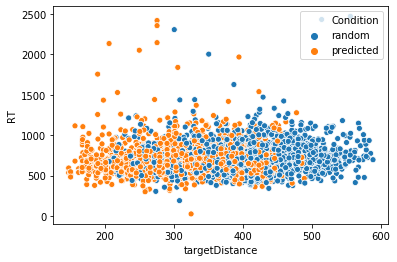

In [5]:
sb.scatterplot(x = 'targetDistance', y = 'RT', data = df, hue = 'Condition' )

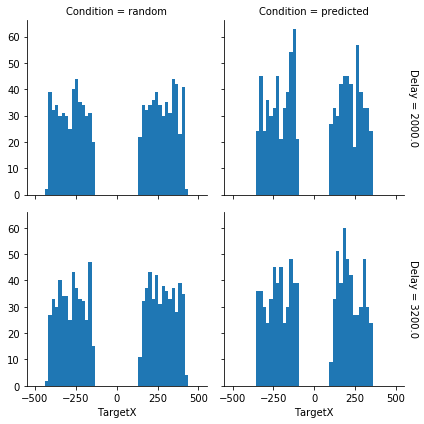

In [42]:
g = sb.FacetGrid(df, row = 'Delay', col = 'Condition', margin_titles = True)
bins = np.linspace(-500, 500, 50)
g.map(plt.hist, "TargetX", bins = bins)

In [13]:
visField = []
for index, row in df.iterrows():
    if row['TargetX'] < 0:
        visField.append('Left')
    elif row['TargetX'] > 0:
        visField.append('Right')
    #else:
        #visField.append('Error')

df['VisField'] = visField

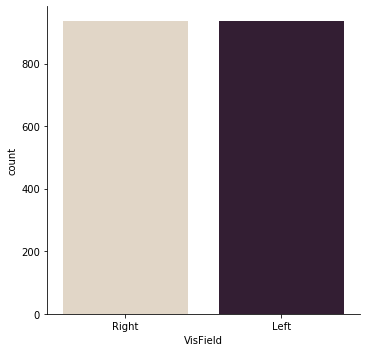

In [15]:
sb.catplot(x = "VisField", kind = "count", palette = "ch:.25", data = df[df['Condition'] == 'predicted']);

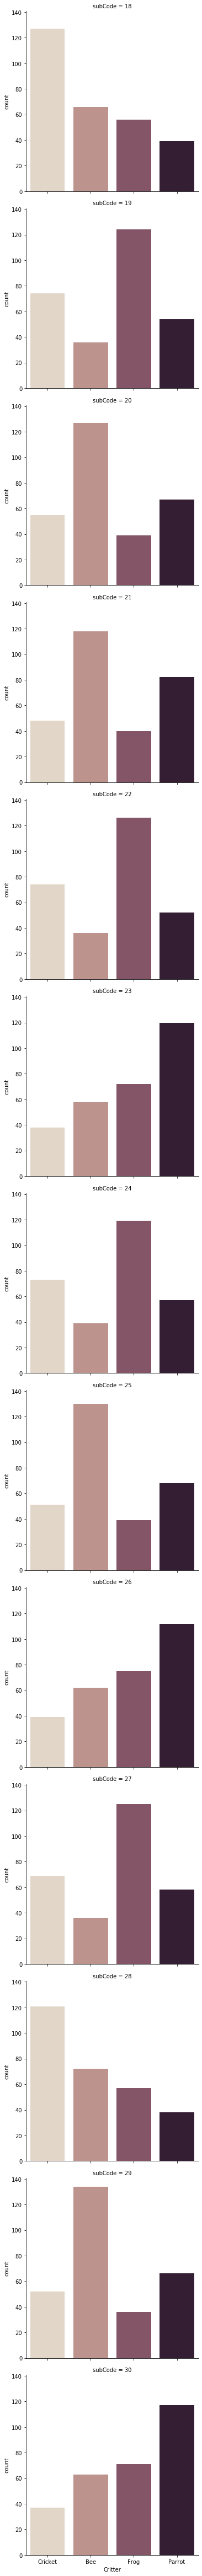

In [64]:
sb.factorplot(x = "Critter", row = 'subCode', kind = "count", palette = "ch:.25", data = df);

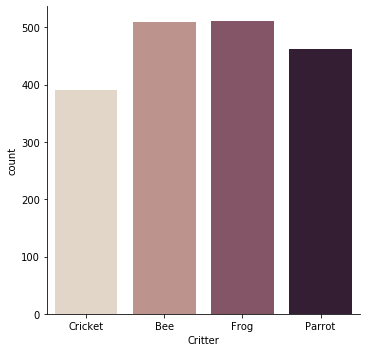

In [11]:
sb.catplot(x="Critter", kind="count", palette="ch:.25", data=df[df['Condition'] == 'random']);

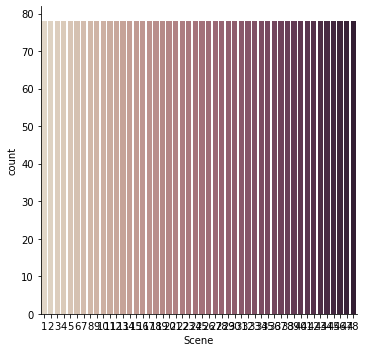

In [26]:
sb.catplot(x="Scene", kind="count", palette="ch:.25", data=df);

In [ ]:
sb.factorplot(x = "Critter", row = 'subCode', kind = "count", palette = "ch:.25", data = df);

/Users/yvonnefonken/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


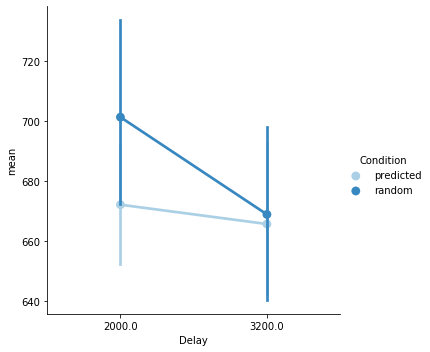

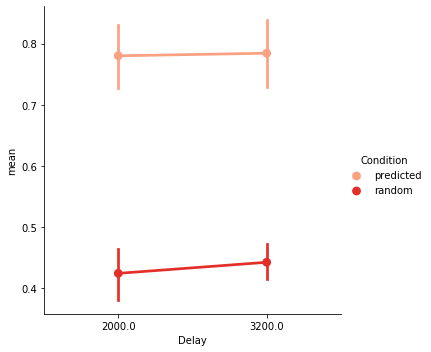

In [7]:

%matplotlib inline 
#RT by validity
grouped = df[df['correct'] == 1.0].groupby(['Delay', 'subCode', 'Condition'])
grouped_RT = grouped['RT']
aggRTdata = grouped_RT.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Delay' , y = 'mean', data = aggRTdata, hue = 'Condition', palette = 'Blues')

#Precision
groupedP = df.groupby(['Delay', 'subCode', 'Condition'])
grouped_P = groupedP['correct']
aggPrecdata = grouped_P.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Delay' , y = 'mean', data = aggPrecdata, hue = 'Condition', palette = 'Reds')


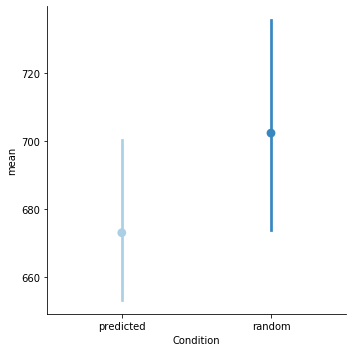

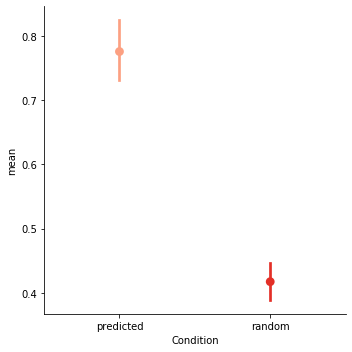

In [16]:

%matplotlib inline 
#RT by validity
grouped = df[df['correct'] == 1.0].groupby([ 'subCode', 'Condition'])
grouped_RT = grouped['RT']
aggRTdata = grouped_RT.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Condition' , y = 'mean', data = aggRTdata,  palette = 'Blues')

#Precision
groupedP = df.groupby([ 'subCode', 'Condition'])
grouped_P = groupedP['correct']
aggPrecdata = grouped_P.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Condition' , y = 'mean', data = aggPrecdata, palette = 'Reds')

In [17]:
# Test RT difference
indexCorrect = (df['correct'] == 1) & (df['RT']< 1200)
groupID = df[indexCorrect].groupby(['Delay', 'Condition', 'subCode'])
RTdiffGr = groupID['RT']
RTdiffAgg = RTdiffGr.agg(['mean'])

T1 = RTdiffAgg.loc[([2000],  ["predicted"]), 'mean']
T2 = RTdiffAgg.loc[([2000],  ["random"]), 'mean']
RTdiffAgg = RTdiffAgg.reset_index()



ttestResults = sp.stats.ttest_rel(T1, T2)
print(ttestResults)

Ttest_relResult(statistic=-2.3464847035493963, pvalue=0.036947895517209735)


In [17]:
# Test RT difference
indexCorrect = (df['correct'] == 1) & (df['RT']< 1200)
groupID = df[indexCorrect].groupby([ 'Condition', 'subCode'])
RTdiffGr = groupID['RT']
RTdiffAgg = RTdiffGr.agg(['mean'])

T1 = RTdiffAgg.loc[(  ["predicted"]), 'mean']
T2 = RTdiffAgg.loc[(  ["random"]), 'mean']
RTdiffAgg = RTdiffAgg.reset_index()



ttestResults = sp.stats.ttest_rel(T1, T2)
print(ttestResults)

Ttest_relResult(statistic=-2.5223575732798453, pvalue=0.026792937217333994)


In [ ]:
AccdiffAgg


In [12]:
# Test accuracy difference

groupID = df[df['RT']< 1200].groupby(['Delay', 'Condition', 'subCode'])
AccdiffGr = groupID['correct']
AccdiffAgg = AccdiffGr.agg(['mean'])

T1 = AccdiffAgg.loc[([2000],  ["predicted"]), 'mean']
T2 = AccdiffAgg.loc[([2000],  ["random"]), 'mean']
AccdiffAgg = AccdiffAgg.reset_index()


ttestResults = sp.stats.ttest_rel(T1, T2)
print(ttestResults)

Ttest_relResult(statistic=1.073174438149132, pvalue=0.3111232454123126)


In [18]:
# Test accuracy difference
groupID = df[df['RT']< 1200].groupby( ['Condition', 'subCode'])
AccdiffGr = groupID['correct']
AccdiffAgg = AccdiffGr.agg(['mean'])

T1 = AccdiffAgg.loc[(  ["predicted"]), 'mean']
T2 = AccdiffAgg.loc[(  ["random"]), 'mean']
AccdiffAgg = AccdiffAgg.reset_index()


ttestResults = sp.stats.ttest_rel(T1, T2)
print(ttestResults)

Ttest_relResult(statistic=22.545343469561907, pvalue=3.429661247423454e-11)


In [ ]:
AccdiffAgg

In [14]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

groupID = df.groupby(['Delay', 'Condition', 'subCode'])
AccdiffGr = groupID['correct']
AccdiffAgg = AccdiffGr.agg(['mean']).reset_index()

formula = 'mean ~ Delay + Condition'
modelAcc = ols(formula, AccdiffAgg).fit()
aov_table = anova_lm(modelAcc, typ=2)

# Wrong code, this is not a repeated measures anova

In [ ]:
aov_table

In [15]:
from statsmodels.stats.anova import AnovaRM

groupID = df[df['RT']<1200].groupby(['Delay', 'Condition', 'subCode'])
AccdiffGr = groupID['correct']
AccdiffAgg = AccdiffGr.agg(['mean']).reset_index()
aovrm = AnovaRM(AccdiffAgg, 'mean', 'subCode', within=['Delay', 'Condition'])
res = aovrm.fit()
print(res)

                    Anova
                F Value Num DF Den DF Pr > F
--------------------------------------------
Delay            1.1791 1.0000 9.0000 0.3058
Condition        3.3049 1.0000 9.0000 0.1024
Delay:Condition  0.2657 1.0000 9.0000 0.6187



In [16]:
from statsmodels.stats.anova import AnovaRM
indexCorrect = (df['correct'] == 1) & (df['RT']< 1200)
groupID = df[indexCorrect].groupby(['Delay', 'Condition', 'subCode'])
RTdiffGr = groupID['RT']
RTdiffAgg = RTdiffGr.agg(['mean']).reset_index()
aovrmRT = AnovaRM(RTdiffAgg, 'mean', 'subCode', within=['Delay', 'Condition'])
resRT = aovrmRT.fit()
print(resRT)

                    Anova
                F Value Num DF Den DF Pr > F
--------------------------------------------
Delay            3.1246 1.0000 9.0000 0.1109
Condition       17.7319 1.0000 9.0000 0.0023
Delay:Condition  5.4622 1.0000 9.0000 0.0442



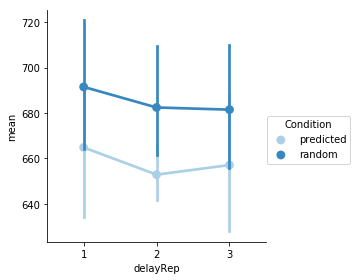

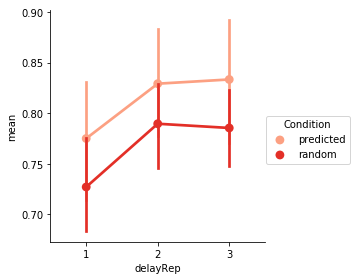

In [17]:
# Plot by repetition
%matplotlib inline  
#RT by validity
grouped = df[df['correct'] == 1.0].groupby(['delayRep', 'subCode', 'Condition'])
grouped_RT = grouped['RT']
aggRTdata = grouped_RT.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'delayRep' , y = 'mean', data = aggRTdata, hue = 'Condition', palette = 'Blues')

#Precision
groupedP = df.groupby(['delayRep', 'subCode', 'Condition'])
grouped_P = groupedP['correct']
aggPrecdata = grouped_P.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'delayRep' , y = 'mean', data = aggPrecdata, hue = 'Condition', palette = 'Reds')

In [ ]:
import statsmodels
statsmodels.__version__


In [ ]:
indexGroup = np.zeros(len(df))
indexGroup = (df['Delay'] == 5000.0)*(df['Condition'] == 'random')*(df['subCode'] == 2)
df[indexGroup]

In [ ]:
%matplotlib inline
#RT by validity
grouped = df[df['correct'] == 1.0].groupby(['Delay', 'subCode', 'Condition'])
grouped_RT = grouped['RT']
aggRTdata = grouped_RT.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Delay' , y = 'mean', data = aggRTdata, hue = 'Condition', hue_order = ['random', 'predicted'], palette = 'Blues')

#Precision
groupedP = df.groupby(['Delay', 'subCode', 'Condition'])
grouped_P = groupedP['correct']
aggPrecdata = grouped_P.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Delay' , y = 'mean', data = aggPrecdata, hue = 'Condition', hue_order = ['random', 'predicted'], palette = 'Reds')



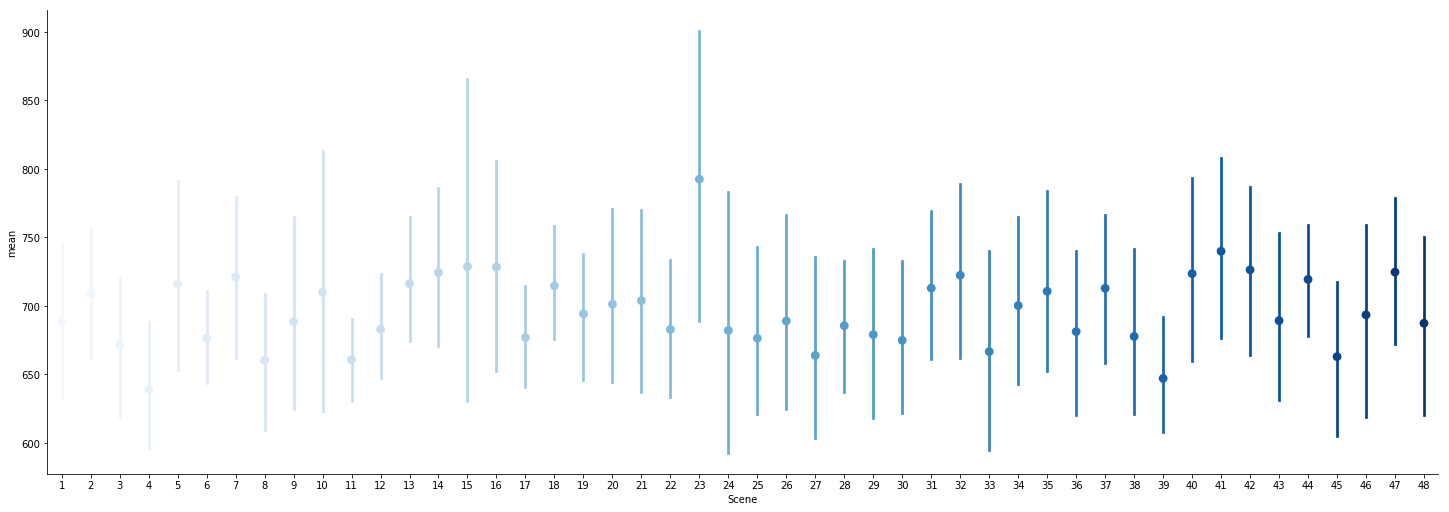

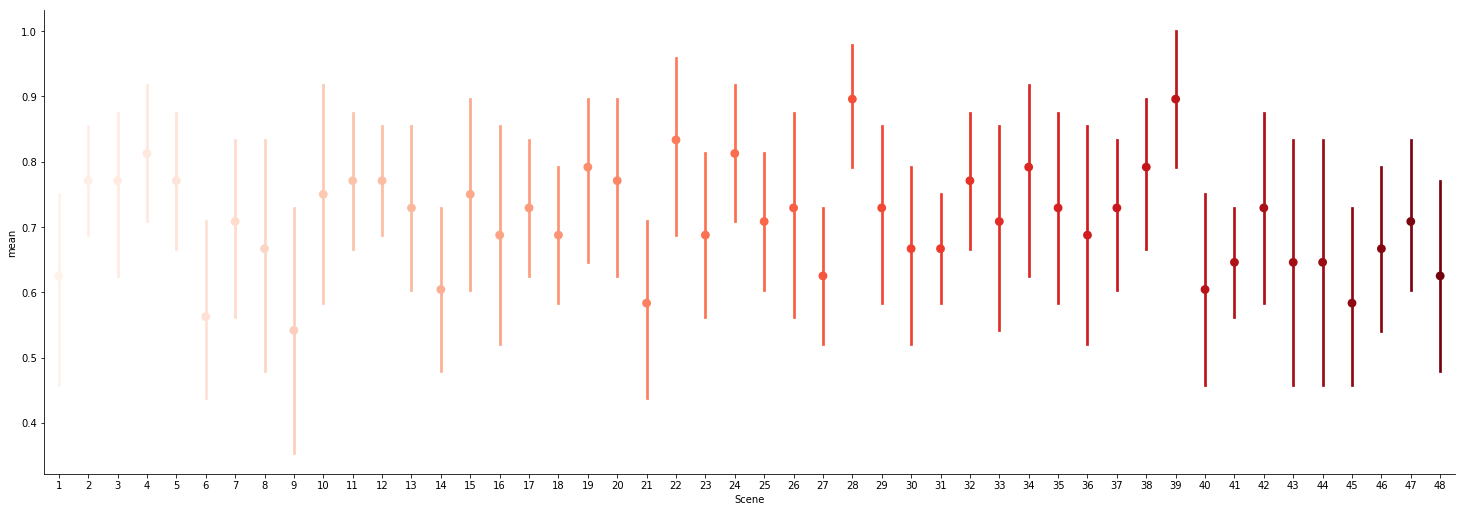

In [9]:
# Check performance on individual scenes

%matplotlib inline
#RT by validity
grouped = df[df['correct'] == 1.0].groupby(['Scene', 'subCode'])
grouped_RT = grouped['RT']
aggRTdata = grouped_RT.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Scene' , y = 'mean', data = aggRTdata, palette = 'Blues')

fig1 = plt.gcf() 
fig1.set_size_inches(25,8)

#Precision
groupedP = df.groupby(['Scene', 'subCode'])
grouped_P = groupedP['correct']
aggPrecdata = grouped_P.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Scene' , y = 'mean', data = aggPrecdata, palette = 'Reds')

fig = plt.gcf() 
fig.set_size_inches(25,8)


In [ ]:
#By subject
%matplotlib inline
#RT by validity
grouped = df[df['correct'] == 1.0].groupby(['Delay', 'subCode', 'Condition'])
grouped_RT = grouped['RT']
aggRTdata = grouped_RT.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Condition' , y = 'mean', data = aggRTdata, hue = 'subCode', col = 'Delay')

#Precision
groupedP = df.groupby(['Delay', 'subCode', 'Condition'])
grouped_P = groupedP['correct']
aggPrecdata = grouped_P.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Condition' , y = 'mean', data = aggPrecdata, hue = 'subCode', col = 'Delay')




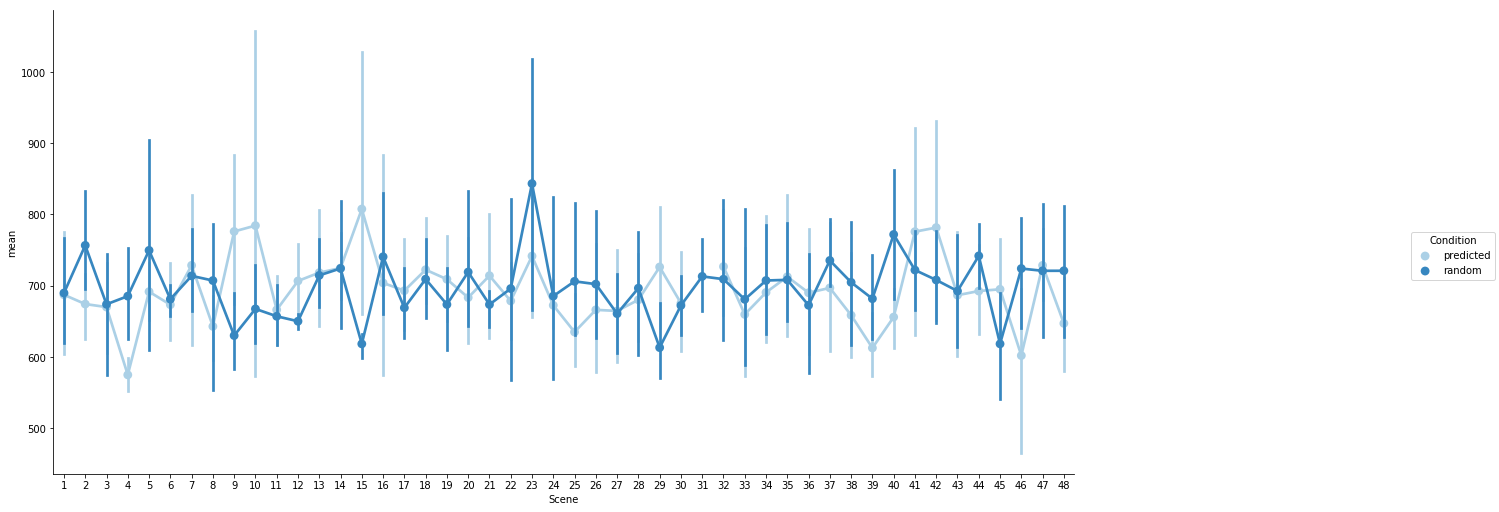

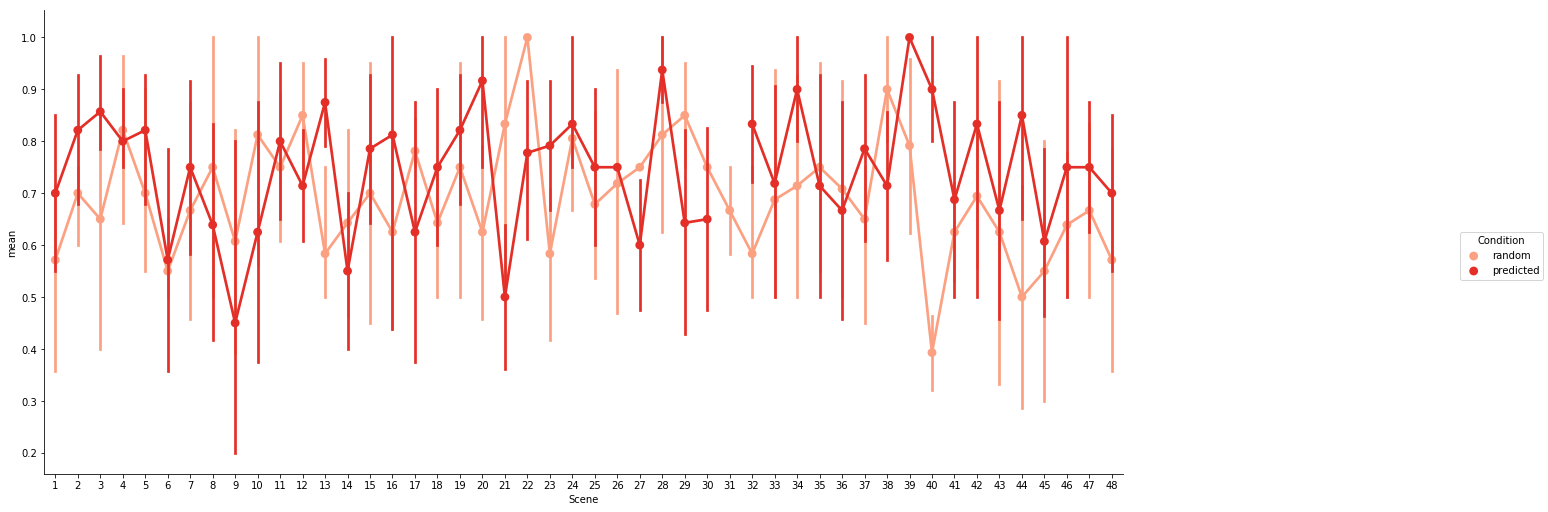

In [7]:
# Check performance on individual scenes -- plot it by condition

%matplotlib inline
#RT by validity
grouped = df[df['correct'] == 1.0].groupby(['Scene', 'subCode', 'Condition'])
grouped_RT = grouped['RT']
aggRTdata = grouped_RT.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Scene' , y = 'mean', data = aggRTdata, hue = 'Condition',  palette = 'Blues')

fig1 = plt.gcf() 
fig1.set_size_inches(25,8)

#Precision
groupedP = df.groupby(['Scene', 'subCode', 'Condition'])
grouped_P = groupedP['correct']
aggPrecdata = grouped_P.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'Scene' , y = 'mean', data = aggPrecdata, hue = 'Condition', palette = 'Reds')

fig = plt.gcf() 
fig.set_size_inches(25,8)

In [64]:
# Use linear mixed effects to check effects of non-relevant variables (scenes/targets etc)
import statsmodels.formula.api as smf

dfLME = df.dropna(subset = ['RT'])
dfLME['Scene'] = dfLME['Scene'].astype(str)


modelLMERT = smf.mixedlm("RT~Condition +  Delay ",dfLME, groups = dfLME['Critter'])
LMERTFit = modelLMERT.fit()
print(LMERTFit.summary())

              Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   RT         
No. Observations:     2209      Method:               REML       
No. Groups:           4         Scale:                29433.2051 
Min. group size:      526       Likelihood:           -14499.0838
Max. group size:      570       Converged:            Yes        
Mean group size:      552.2                                      
-----------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
-----------------------------------------------------------------
Intercept           699.549   17.644 39.649 0.000 664.969 734.130
Condition[T.random]  13.463    7.303  1.843 0.065  -0.852  27.777
Delay                 0.002    0.006  0.269 0.788  -0.010   0.014
Group Var           137.934    0.913                             



/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [63]:
LMERTFit.random_effects

{'1': Group    8.654397e-07
 dtype: float64, '10': Group   -0.000001
 dtype: float64, '11': Group   -0.000001
 dtype: float64, '12': Group    2.017596e-08
 dtype: float64, '13': Group    0.000002
 dtype: float64, '14': Group    0.000002
 dtype: float64, '15': Group    8.976901e-07
 dtype: float64, '16': Group    0.000001
 dtype: float64, '17': Group   -0.000001
 dtype: float64, '18': Group    8.843793e-07
 dtype: float64, '19': Group   -8.721603e-08
 dtype: float64, '2': Group    5.219197e-07
 dtype: float64, '20': Group   -8.375045e-07
 dtype: float64, '21': Group   -9.312792e-08
 dtype: float64, '22': Group   -0.000001
 dtype: float64, '23': Group    7.445081e-07
 dtype: float64, '24': Group   -0.000002
 dtype: float64, '25': Group   -0.000002
 dtype: float64, '26': Group    6.747125e-07
 dtype: float64, '27': Group   -0.000001
 dtype: float64, '28': Group   -0.000002
 dtype: float64, '29': Group   -0.000001
 dtype: float64, '3': Group   -7.793906e-07
 dtype: float64, '30': Group    

In [54]:
dfLME.to_csv('DataforLME.csv')

In [57]:
modelLMEAcc = smf.mixedlm("correct~Condition +  Delay",dfLME, groups = dfLME['Scene'])
LMEAccFit = modelLMEAcc.fit()
print(LMEAccFit.summary())

             Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   correct   
No. Observations:   2209      Method:               REML      
No. Groups:         48        Scale:                0.1894    
Min. group size:    42        Likelihood:           -1318.7223
Max. group size:    48        Converged:            Yes       
Mean group size:    46.0                                      
--------------------------------------------------------------
                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept            0.781    0.043 18.363 0.000  0.698  0.864
Condition[T.random] -0.056    0.019 -2.984 0.003 -0.093 -0.019
Delay               -0.000    0.000 -0.271 0.786 -0.000  0.000
Group Var            0.001    0.003                           



/anaconda2/lib/python2.7/site-packages/statsmodels/regression/mixed_linear_model.py:2045: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [58]:
LMEAccFit.random_effects

{'1': Group   -0.024929
 dtype: float64, '10': Group    0.004345
 dtype: float64, '11': Group    0.016443
 dtype: float64, '12': Group    0.00608
 dtype: float64, '13': Group    0.000482
 dtype: float64, '14': Group   -0.010919
 dtype: float64, '15': Group    0.008733
 dtype: float64, '16': Group   -0.007794
 dtype: float64, '17': Group    0.007007
 dtype: float64, '18': Group   -0.004577
 dtype: float64, '19': Group    0.015534
 dtype: float64, '2': Group    0.00608
 dtype: float64, '20': Group    0.022824
 dtype: float64, '21': Group   -0.024107
 dtype: float64, '22': Group    0.019572
 dtype: float64, '23': Group    0.001549
 dtype: float64, '24': Group    0.025583
 dtype: float64, '25': Group    0.00044
 dtype: float64, '26': Group    0.011168
 dtype: float64, '27': Group   -0.018584
 dtype: float64, '28': Group    0.040918
 dtype: float64, '29': Group    0.003363
 dtype: float64, '3': Group    0.010219
 dtype: float64, '30': Group   -0.012165
 dtype: float64, '31': Group   -0.0083

In [40]:
df['RT'] == NaN

NameError: name 'NaN' is not defined

In [33]:
df['Scene'] = df['Scene'].astype(str)

In [34]:
df['Scene']

0      15
1      27
2      11
3      12
4      45
5      26
6       7
7      42
8      39
9      23
10     14
11     22
12     29
13     10
14     21
15     33
16     47
17      1
18     18
19     28
20     41
21     19
22      9
23     32
24      8
25     16
26     43
27     37
28     35
29      4
       ..
162    41
163     1
164    16
165    20
166     4
167    31
168    11
169    12
170    43
171    39
172    40
173    30
174    35
175     6
176     3
177    19
178    38
179    45
180    25
181    46
182     2
183    47
184    23
185    17
186    10
187    15
188    33
189    42
190     7
191    22
Name: Scene, Length: 2304, dtype: object

### Plot for individual subjects

In [ ]:
# RT by validity by subject -- MOVIES
#A = df['correct'] == 1.0 
#B = df['kind'] == 'Mov'
#C = A&B
grouped = df[df['correct'] == 1.0].groupby(['Delay', 'subCode', 'nRep'])
grouped_RT = grouped['RT']
aggRTdataSub = grouped_RT.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'nRep', y = 'mean', data = aggRTdataSub, hue = 'subCode', col =  'Delay')

# Precision by validity by subject -- MOVIES

groupedP = df.groupby(['Delay', 'subCode', 'nRep'])
grouped_P = groupedP['correct']
aggPrecdataSub = grouped_P.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'nRep' , y = 'mean', data = aggPrecdataSub, hue = 'subCode', col =  'Delay')

In [ ]:
# RT by validity by subject -- MOVIES
A = df['correct'] == 1.0 
B = df['blockType'] == 'learning1' 
D = df['blockType'] == 'testing1'
C = A&(B+D)
grouped = df[C].groupby(['Delay', 'subCode', 'nRep'])
grouped_RT = grouped['RT']
aggRTdataSub = grouped_RT.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'nRep', y = 'mean', data = aggRTdataSub, hue = 'subCode', col =  'Delay')

# Precision by validity by subject -- MOVIES

groupedP = df[B+D].groupby(['Delay', 'subCode', 'nRep'])
grouped_P = groupedP['correct']
aggPrecdataSub = grouped_P.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'nRep' , y = 'mean', data = aggPrecdataSub, hue = 'subCode', col =  'Delay')

In [ ]:
# RT by validity by subject -- MOVIES
A = df['correct'] == 1.0 
B = df['blockType'] == 'learning2' 
D = df['blockType'] == 'testing2'
C = A&(B+D)
grouped = df[C].groupby(['Delay', 'subCode', 'nRep'])
grouped_RT = grouped['RT']
aggRTdataSub = grouped_RT.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'nRep', y = 'mean', data = aggRTdataSub, hue = 'subCode', col =  'Delay')

# Precision by validity by subject -- MOVIES

groupedP = df[B+D].groupby(['Delay', 'subCode', 'nRep'])
grouped_P = groupedP['correct']
aggPrecdataSub = grouped_P.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'nRep' , y = 'mean', data = aggPrecdataSub, hue = 'subCode', col =  'Delay')

In [ ]:
# RT by validity by subject -- STATIC
A = df['correctAnswer'] == 1.0 
B = df['kind'] == 'Static'
C = A&B
grouped = df[C].groupby(['DelaySecs', 'subCode', 'nRepValidity'])
grouped_RT = grouped['recRT']
aggRTdataSub = grouped_RT.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'nRepValidity', order = ['1', '2', '3', '4', '5', '6', 'Invalid', 'Valid'] , y = 'mean', data = aggRTdataSub, hue = 'subCode', col =  'DelaySecs')

# Precision by validity by subject -- MOVIES

groupedP = df[df['kind'] == 'Static'].groupby(['DelaySecs', 'subCode', 'nRepValidity'])
grouped_P = groupedP['correctAnswer']
aggPrecdataSub = grouped_P.agg(['mean', 'std', 'min', 'max']).reset_index()
sb.factorplot(x = 'nRepValidity', order = ['1', '2', '3', '4', '5', '6', 'Invalid', 'Valid'] , y = 'mean', data = aggPrecdataSub, hue = 'subCode', col =  'DelaySecs')

In [ ]:
#A = aggRTdataSub.loc[(slice(0.75), slice(None), slice ('Invalid')), 'mean']

B = aggRTdataSub.loc[([0.75], slice(None), ['Invalid'], ['Static']), 'mean']
B
T1 = aggRTdataSub.loc[([0.75], slice(None), ['2'], ['Static']), 'mean']
C = aggRTdataSub.loc[([0.75], slice(None), ['3'], ['Static']), 'mean']
D = (T1 + C)/2
D
C

## Invalid vs learned comparisons

In [ ]:
# Compare valid vs invalid
grouped = df[df['correct'] == 1.0].groupby(['Delay', 'subCode', 'nRep', 'blockType'])
grouped_RT = grouped['RT']
aggRTdataSub = grouped_RT.agg(['mean', 'std', 'min', 'max'])
T1 = aggRTdataSub.loc[([3200.0], slice(0,6), ['Valid'], [ 'testing2']), 'mean'].mean(level = 'subCode')
T2 = aggRTdataSub.loc[([3200.0], slice(0,6), ['Invalid'], [ 'testing2']), 'mean'].mean(level= 'subCode')
print(T1)
print(T2)
ttestResults = sp.stats.ttest_rel(T1, T2)
print(ttestResults)
sb.barplot(['Valid', 'Invalid'], [np.mean(T1), np.mean(T2)])

In [ ]:
T1

## Run regression analysis

In [ ]:
# Fit linear model to RT data for nRep 1 through 6
D = aggRTdata['nRep']
E = pd.to_numeric(D, errors = 'coerce')
LinearFitRT = aggRTdata.copy()
LinearFitRT['nRepValidity'] = E
#linearFitRT = aggRTdata[aggRTdata['nRepValidity'].to_numeric() <7 ]
LinearFitRT

In [ ]:
aggRTdataSub


In [ ]:
grouped = df[df['correct'] == 1.0].groupby(['Delay', 'subCode', 'nRep', 'blockType'])
grouped_RT = grouped['RT']
aggRTdataSub = grouped_RT.agg(['mean', 'std', 'min', 'max'])
#aggRTdataSub['nRep'] = str(aggRTdataSub['nRep'])
RegDat1= aggRTdataSub.loc[([2000.0, 3200.00], slice(0,6), ['1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0'], ['learning1', 'learning2']), 'mean'].reset_index()
RegDat2 = aggRTdataSub.loc[([2000.0, 3200.00],slice(0,6), ['1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0'], ['learning2']), 'mean'].reset_index()
RegDat1
# setup linear model

In [ ]:
# setup linear model movies
x = np.asarray(pd.to_numeric(RegDat1['nRep'], errors = 'coerce'))
y = np.asarray(RegDat1['mean'])
x = sm.add_constant(x)

model1 = sm.OLS(y, x).fit()
predictions = model1.predict()

model1.summary()

In [ ]:
# try linear mixed effects
import statsmodels.formula.api as smf
RegDat1['nRep']= pd.to_numeric(RegDat1['nRep'], errors = 'coerce')
modelLME1 = smf.mixedlm("mean~nRep", RegDat1, groups = RegDat1['subCode'])
LME1Fit = modelLME1.fit()
print(LME1Fit.summary())

In [ ]:
# try linear mixed effects
import statsmodels.formula.api as smf
RegDat2['nRep']= pd.to_numeric(RegDat2['nRep'], errors = 'coerce')
modelLME2 = smf.mixedlm("mean~nRep", RegDat2, groups = RegDat2['subCode'])
LME2Fit = modelLME2.fit()
print(LME2Fit.summary())

In [ ]:
# try linear mixed effects
import statsmodels.formula.api as smf
RegDatStatic['nRepValidity']= pd.to_numeric(RegDatStatic['nRepValidity'], errors = 'coerce')
modelLMEstatic = smf.mixedlm("mean~nRepValidity", RegDatStatic, groups = RegDatStatic['subCode'])
LMEstaticFit = modelLMEstatic.fit()
print(LMEstaticFit.summary())